Desenvolver um programa em Python para calcular as frequências naturais de vibração e os modos normais (deslocamentos relativos) de sistemas massa-mola unidimensionais com as massas das pontas presas a paredes por molas, e analisar como variações nas massas e nas constantes de mola influenciam o comportamento do sistema.

 

# Instruções:
### Sistema com duas massas e extremidades fixas:

Modele um sistema de duas massas conectadas por uma mola, com as extremidades também ligadas a paredes por molas adicionais.

Inicialmente, use:

Massas iguais: m_1 = m_2 = 1kg

Constantes de mola iguais: k = 1\,\text{N/m} em todas as molas
 
 -----------------------------------------------------------------------------------------------------------------------------

Em seguida, varie m_2 mantendo m_1 fixo e observe:

 

Mudança nas frequências naturais

Alteração dos modos normais (forma dos deslocamentos relativos)


### Extensão para três massas com extremidades fixas:

 

Modele uma cadeia de três massas ligadas entre si por molas e com molas também conectando a primeira e a última massa a paredes rígidas.

Estude diferentes distribuições de massa:

 

Todas iguais

Apenas uma diferente

Todas diferentes

 

### Analise:

 

Como a variação das massas afeta as frequências

Como se modificam os padrões dos modos normais

 

 

Variação das constantes de mola:

 

Fixe as massas e varie os valores das constantes de mola, incluindo:

 

Molas entre as massas

Molas conectadas às paredes

 

Avalie o efeito nas frequências e nos modos normais.

 

 

### Visualizações Recomendadas:
 

Gráficos das frequências naturais em função da variação de massa ou rigidez

Gráficos dos modos normais (com amplitude relativa de cada massa)

Representações animadas ou estáticas dos modos para diferentes configurações

### Entrega Esperada:
 

Código Python funcional, organizado e comentado

Gráficos representando:

 

Frequências naturais em função dos parâmetros variáveis

Modos normais para diferentes configurações

 

Pequeno relatório (até 300 palavras) interpretando os efeitos observados, com base física

a)

In [5]:
import numpy as np
from numpy.linalg import eig

n = 2 #numero de massas
m = 1 #massa
k = 1 #constante elastica

b = k/m

B = np.array([[b, -b], [-b, b]]) #matriz de coeficientes

Eingen = eig(B) #autovalores e autovetores

l = Eingen[0] #autovalores
v = Eingen[1] #autovetores
print("Autovalores:", l)
print("Autovetores:", v)   

Autovalores: [2. 0.]
Autovetores: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


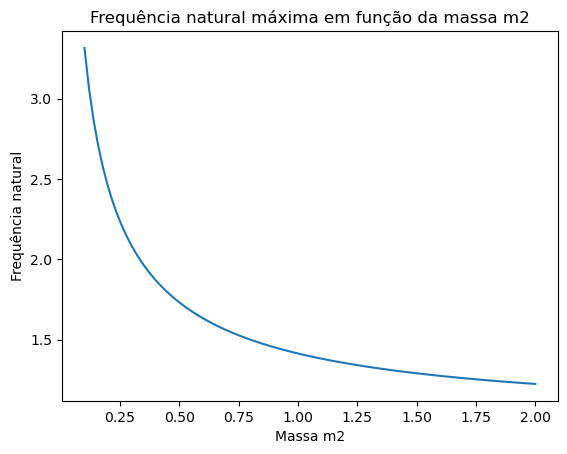

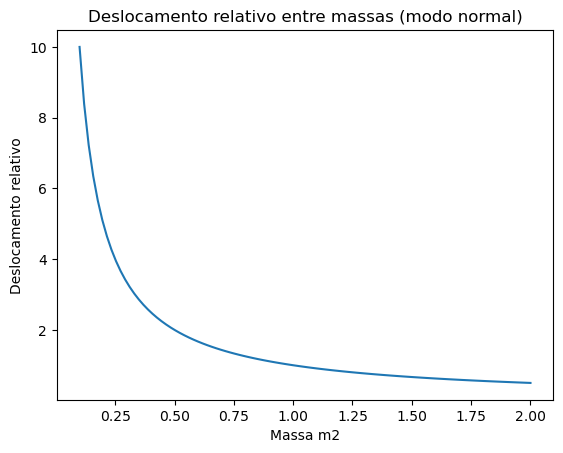

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

m2 = np.linspace(0.1, 2, 100)
m1 = 1  # massa fixa
k = 1   # constante da mola

modos = []
desloc_relativo = []

for m2n in m2:
    # Matriz de coeficientes do sistema
    B = np.array([[k/m1, -k/m1], [-k/m2n, k/m2n]])
    autovalores, autovetores = eig(B)
    
    # Seleciona o maior autovalor (frequência natural máxima)
    idx = np.argmax(autovalores)
    freq_natural = np.sqrt(autovalores[idx])
    modos.append(freq_natural)
    
    # Autovetor correspondente ao maior autovalor (modo normal)
    modo_normal = autovetores[:, idx]
    # Normaliza para que o deslocamento da primeira massa seja 1
    modo_normal = -1*modo_normal / modo_normal[0]
    # Guarda o deslocamento relativo entre as massas
    desloc_relativo.append(modo_normal[1])

# Gráfico das frequências naturais
plt.plot(m2, modos, label='Frequência natural máxima')
plt.xlabel('Massa m2')
plt.ylabel('Frequência natural')
plt.title('Frequência natural máxima em função da massa m2')
plt.show()

# Gráfico do deslocamento relativo
plt.plot(m2, desloc_relativo, label='Deslocamento relativo (m2/m1)')
plt.xlabel('Massa m2')
plt.ylabel('Deslocamento relativo')
plt.title('Deslocamento relativo entre massas (modo normal)')
plt.show()

![Fluxo1](ATV4_1.png)

b)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

m3 = 1
m2 = 1
m1 = 1  # massa fixa
k = 1   # constante da mola

B = np.array([[-(k+k)/m1, k/m1, 0], [k/m2, -(k+k)/m2, k/m2], [0, k/m3, -k/m3]])

Eingen = eig(B) #autovalores e autovetores

l = Eingen[0] #autovalores
v = Eingen[1] #autovetores
print("Autovalores:", l)
print("Autovetores:", v)   

Autovalores: [-3.2469796  -1.55495813 -0.19806226]
Autovetores: [[ 0.59100905  0.73697623  0.32798528]
 [-0.73697623  0.32798528  0.59100905]
 [ 0.32798528 -0.59100905  0.73697623]]


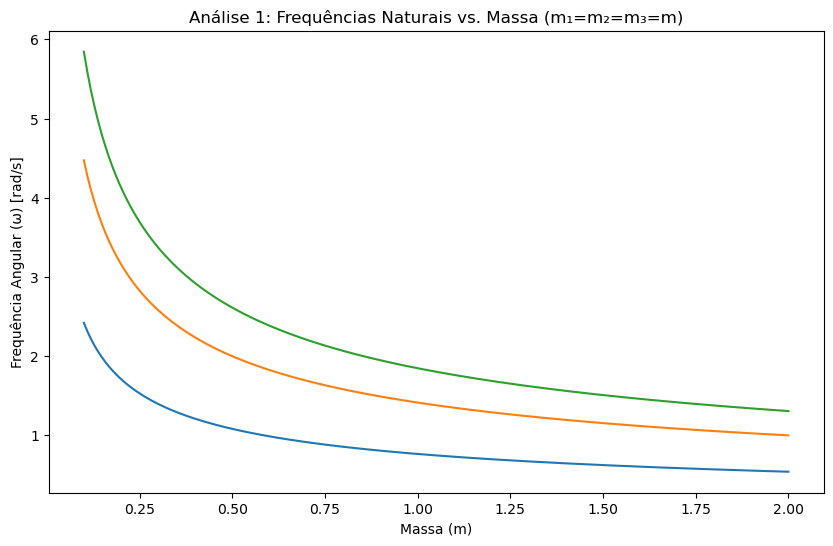

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 1: Variando todas as massas igualmente ---
# Aqui, investigamos como as frequências do sistema mudam quando todas as
# massas são idênticas (m1=m2=m3=m) e esse valor 'm' é variado.

k = 1.0  # Constante da mola
massas_iguais = np.linspace(0.1, 2.0, 200)  # Faixa de valores para m

# Listas para armazenar as frequências (omega)
omegas_1, omegas_2, omegas_3 = [], [], []

for m in massas_iguais:
    # Matriz de Massa M
    M = np.diag([m, m, m])
    
    # Matriz de Rigidez K (correta para extremidades fixas)
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolvemos o problema de autovalor: (M^-1 * K) * A = omega^2 * A
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    
    autovalores_quadrados, _ = eig(sistema)
    
    # Ordenamos os autovalores para que os gráficos não cruzem
    autovalores_ordenados = np.sort(autovalores_quadrados)
    
    # Frequências angulares (omega) são a raiz dos autovalores
    omegas = np.sqrt(autovalores_ordenados)
    
    omegas_1.append(omegas[0])
    omegas_2.append(omegas[1])
    omegas_3.append(omegas[2])

# Gráfico da Análise 1
plt.figure(figsize=(10, 6))
plt.plot(massas_iguais, omegas_1, label='ω₁ (Modo 1 - Baixa Frequência)')
plt.plot(massas_iguais, omegas_2, label='ω₂ (Modo 2 - Frequência Intermediária)')
plt.plot(massas_iguais, omegas_3, label='ω₃ (Modo 3 - Alta Frequência)')
plt.title('Análise 1: Frequências Naturais vs. Massa (m₁=m₂=m₃=m)')
plt.xlabel('Massa (m)')
plt.ylabel('Frequência Angular (ω) [rad/s]')
plt.show()



 

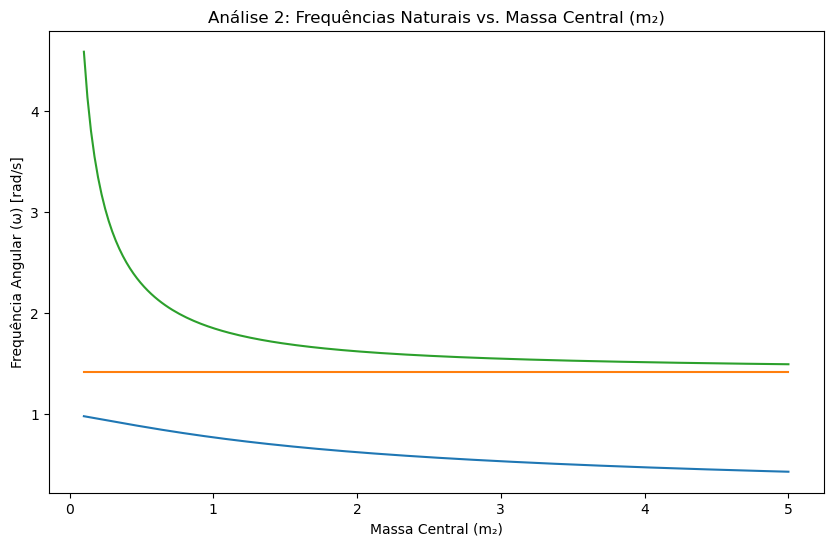

In [13]:
# --- ANÁLISE 2: Variando apenas a massa central ---
# Esta é uma análise mais rica. Mantemos m1 e m3 fixas e variamos m2.
# Isso nos permite ver o efeito da quebra parcial de simetria.

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

k = 1.0
m_fixa = 1.0  # Massas das extremidades m1 e m3
massa_central_range = np.linspace(0.1, 5.0, 200) # Faixa de valores para m2

omegas_1_cenario2, omegas_2_cenario2, omegas_3_cenario2 = [], [], []

for m2 in massa_central_range:
    # Matriz de Massa M com m2 variável
    M = np.diag([m_fixa, m2, m_fixa])
    
    # Matriz de Rigidez K (a mesma de antes)
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolve o sistema da mesma forma
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    autovalores_quadrados, _ = eig(sistema)
    
    # Ordena e calcula as frequências
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1_cenario2.append(omegas[0])
    omegas_2_cenario2.append(omegas[1])
    omegas_3_cenario2.append(omegas[2])

# Gráfico da Análise 2
plt.figure(figsize=(10, 6))
plt.plot(massa_central_range, omegas_1_cenario2, label='ω₁')
plt.plot(massa_central_range, omegas_2_cenario2, label='ω₂ (Modo Antissimétrico)')
plt.plot(massa_central_range, omegas_3_cenario2, label='ω₃')
plt.title('Análise 2: Frequências Naturais vs. Massa Central (m₂)')
plt.xlabel('Massa Central (m₂)')
plt.ylabel('Frequência Angular (ω) [rad/s]')
plt.show()

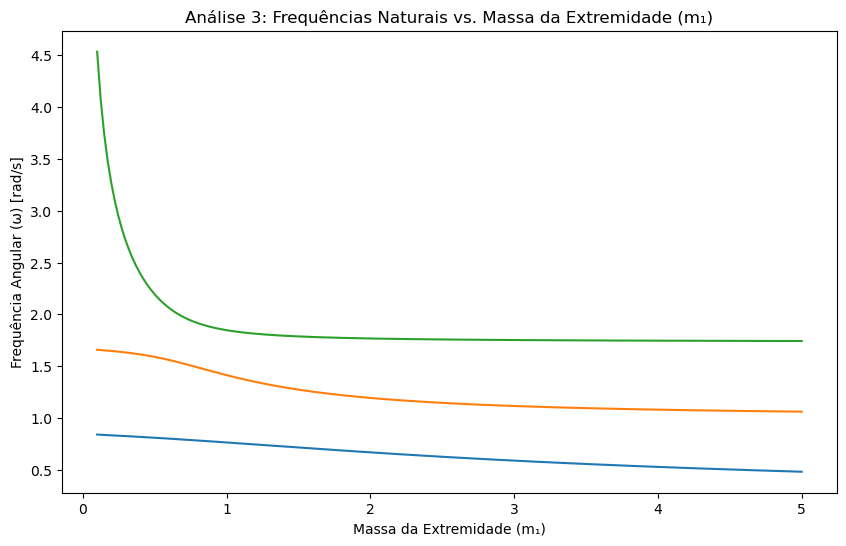

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 3: Variando apenas a massa da extremidade (m1) ---
# Mantemos m2 e m3 fixas para ver o efeito da quebra de simetria.

k = 1.0
m2_fixa = 1.0  # Massa central fixa
m3_fixa = 1.0  # Massa da outra extremidade fixa
massa_m1_range = np.linspace(0.1, 5.0, 200) # Faixa de valores para m1

# Listas para armazenar as frequências (omega)
omegas_1_cenario3, omegas_2_cenario3, omegas_3_cenario3 = [], [], []

for m1 in massa_m1_range:
    # Matriz de Massa M com m1 variável
    M = np.diag([m1, m2_fixa, m3_fixa])
    
    # Matriz de Rigidez K (permanece a mesma)
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolve o sistema
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    autovalores_quadrados, _ = eig(sistema)
    
    # Ordena e calcula as frequências
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1_cenario3.append(omegas[0])
    omegas_2_cenario3.append(omegas[1])
    omegas_3_cenario3.append(omegas[2])

# Gráfico da Análise 3
plt.figure(figsize=(10, 6))
plt.plot(massa_m1_range, omegas_1_cenario3, label='ω₁')
plt.plot(massa_m1_range, omegas_2_cenario3, label='ω₂')
plt.plot(massa_m1_range, omegas_3_cenario3, label='ω₃')
plt.title('Análise 3: Frequências Naturais vs. Massa da Extremidade (m₁)')
plt.xlabel('Massa da Extremidade (m₁)')
plt.ylabel('Frequência Angular (ω) [rad/s]')
plt.show()

Não é necessário fazer m3 pois o comportamento será igual ao de m1

![Fluxo2](ATV4_2.png)

c)

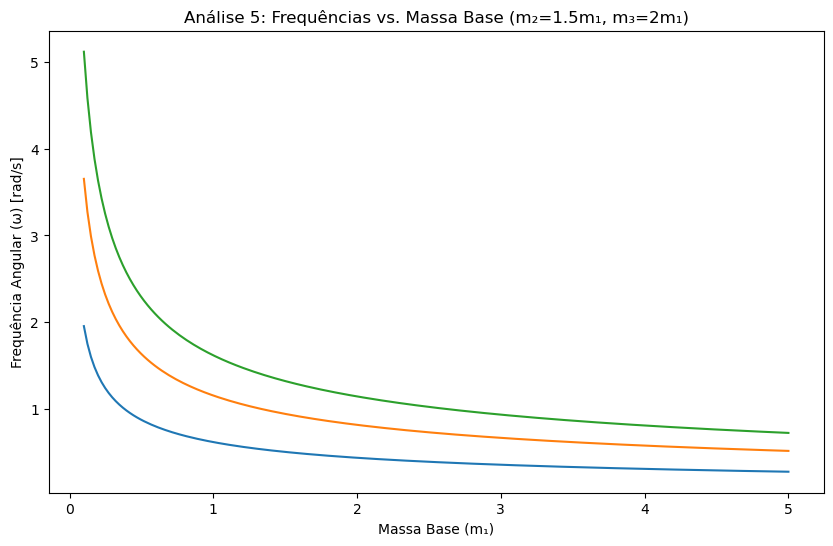

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 5: Todas as Massas Diferentes ---
# m2 e m3 são definidas como múltiplos de m1 para garantir que sejam sempre diferentes.
# m2 = 1.5 * m1
# m3 = 2.0 * m1

k = 1.0
# A faixa de valores agora é para a massa base m1
massa_m1_range = np.linspace(0.1, 5.0, 200) 

# Listas para armazenar as frequências (omega)
omegas_1_cenario5, omegas_2_cenario5, omegas_3_cenario5 = [], [], []

for m1 in massa_m1_range:
    # Define m2 e m3 como funções de m1
    m2 = 1.5 * m1
    m3 = 2.0 * m1
    
    # Matriz de Massa M com todos os valores diferentes
    M = np.diag([m1, m2, m3])
    
    # Matriz de Rigidez K (a mesma, para extremidades fixas)
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolve o sistema
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    autovalores_quadrados, _ = eig(sistema)
    
    # Ordena e calcula as frequências
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1_cenario5.append(omegas[0])
    omegas_2_cenario5.append(omegas[1])
    omegas_3_cenario5.append(omegas[2])

# Gráfico da Análise 5
plt.figure(figsize=(10, 6))
plt.plot(massa_m1_range, omegas_1_cenario5, label='ω₁')
plt.plot(massa_m1_range, omegas_2_cenario5, label='ω₂')
plt.plot(massa_m1_range, omegas_3_cenario5, label='ω₃')
plt.title('Análise 5: Frequências vs. Massa Base (m₂=1.5m₁, m₃=2m₁)')
plt.xlabel('Massa Base (m₁)')
plt.ylabel('Frequência Angular (ω) [rad/s]')
plt.show()

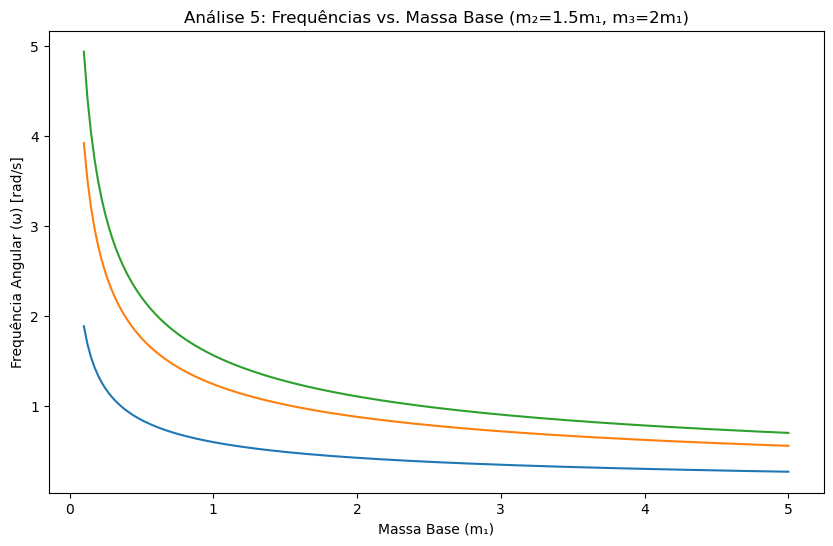

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 5: Todas as Massas Diferentes ---
# m2 e m3 são definidas como múltiplos de m1 para garantir que sejam sempre diferentes.
# m2 = 2.0 * m1
# m3 = 1.5 * m1

k = 1.0
# A faixa de valores agora é para a massa base m1
massa_m1_range = np.linspace(0.1, 5.0, 200) 

# Listas para armazenar as frequências (omega)
omegas_1_cenario5, omegas_2_cenario5, omegas_3_cenario5 = [], [], []

for m1 in massa_m1_range:
    # Define m2 e m3 como funções de m1
    m2 = 2.0 * m1
    m3 = 1.5 * m1
    
    # Matriz de Massa M com todos os valores diferentes
    M = np.diag([m1, m2, m3])
    
    # Matriz de Rigidez K (a mesma, para extremidades fixas)
    K = k * np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])
    
    # Resolve o sistema
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    autovalores_quadrados, _ = eig(sistema)
    
    # Ordena e calcula as frequências
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1_cenario5.append(omegas[0])
    omegas_2_cenario5.append(omegas[1])
    omegas_3_cenario5.append(omegas[2])

# Gráfico da Análise 5
plt.figure(figsize=(10, 6))
plt.plot(massa_m1_range, omegas_1_cenario5, label='ω₁')
plt.plot(massa_m1_range, omegas_2_cenario5, label='ω₂')
plt.plot(massa_m1_range, omegas_3_cenario5, label='ω₃')
plt.title('Análise 5: Frequências vs. Massa Base (m₂=1.5m₁, m₃=2m₁)')
plt.xlabel('Massa Base (m₁)')
plt.ylabel('Frequência Angular (ω) [rad/s]')
plt.show()

c)

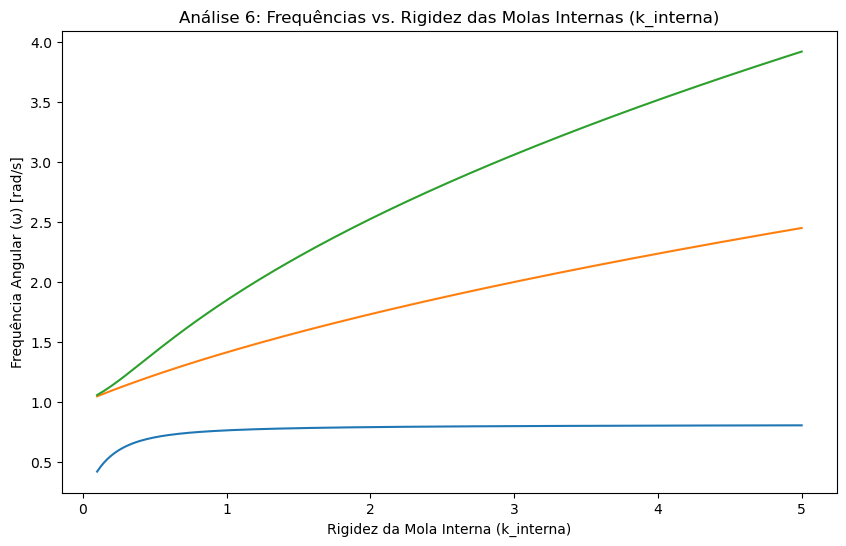

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 6: Variando as Molas Internas Simetricamente ---
massas = np.array([1.0, 1.0, 1.0])  # Massas fixas
M = np.diag(massas)

k_fixa_parede = 1.0  # Molas das paredes constantes
k_interna_range = np.linspace(0.1, 5.0, 200)

omegas_1, omegas_2, omegas_3 = [], [], []

for k_interna in k_interna_range:
    # Matriz de Rigidez K com molas internas variáveis
    K = np.array([
        [k_fixa_parede + k_interna, -k_interna, 0],
        [-k_interna, k_interna + k_interna, -k_interna],
        [0, -k_interna, k_interna + k_fixa_parede]
    ])
    
    # Resolve o sistema
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    autovalores_quadrados, _ = eig(sistema)
    
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1.append(omegas[0])
    omegas_2.append(omegas[1])
    omegas_3.append(omegas[2])

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_interna_range, omegas_1, label='ω₁ (Modo Simétrico)')
plt.plot(k_interna_range, omegas_2, label='ω₂ (Modo Antissimétrico)')
plt.plot(k_interna_range, omegas_3, label='ω₃ (Modo Simétrico)')
plt.title('Análise 6: Frequências vs. Rigidez das Molas Internas (k_interna)')
plt.xlabel('Rigidez da Mola Interna (k_interna)')
plt.ylabel('Frequência Angular (ω) [rad/s]')
plt.show()

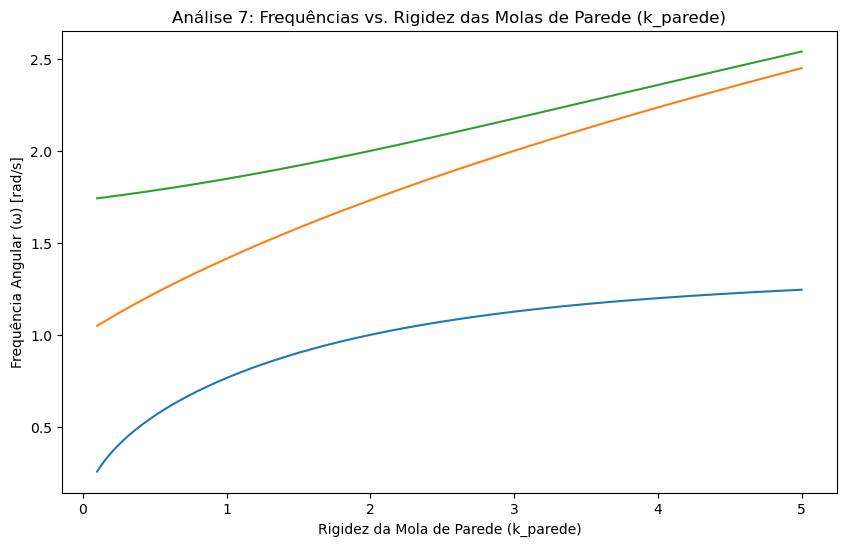

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# --- ANÁLISE 7: Variando as Molas das Paredes Simetricamente ---
massas = np.array([1.0, 1.0, 1.0])
M = np.diag(massas)

k_fixa_interna = 1.0  # Molas internas constantes
k_parede_range = np.linspace(0.1, 5.0, 200)

omegas_1, omegas_2, omegas_3 = [], [], []

for k_parede in k_parede_range:
    # Matriz de Rigidez K com molas de parede variáveis
    K = np.array([
        [k_parede + k_fixa_interna, -k_fixa_interna, 0],
        [-k_fixa_interna, k_fixa_interna + k_fixa_interna, -k_fixa_interna],
        [0, -k_fixa_interna, k_fixa_interna + k_parede]
    ])
    
    # Resolve o sistema
    M_inv = np.linalg.inv(M)
    sistema = np.dot(M_inv, K)
    autovalores_quadrados, _ = eig(sistema)
    
    omegas = np.sqrt(np.sort(autovalores_quadrados))
    
    omegas_1.append(omegas[0])
    omegas_2.append(omegas[1])
    omegas_3.append(omegas[2])

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_parede_range, omegas_1, label='ω₁ (Modo Simétrico)')
plt.plot(k_parede_range, omegas_2, label='ω₂ (Modo Antissimétrico)')
plt.plot(k_parede_range, omegas_3, label='ω₃ (Modo Simétrico)')
plt.title('Análise 7: Frequências vs. Rigidez das Molas de Parede (k_parede)')
plt.xlabel('Rigidez da Mola de Parede (k_parede)')
plt.ylabel('Frequência Angular (ω) [rad/s]')
plt.show()